Introduction & Problem Definition

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

Download Data

In [3]:
# Load data from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

response = requests.get(url)
df = pd.read_csv(io.StringIO(response.text), names=column_names, na_values='?')

Exploratory Data Analysis (EDA)

Starting exploratory data analysis


In [4]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
213,66.0,0.0,4.0,178.0,228.0,1.0,0.0,165.0,1.0,1.0,2.0,2.0,7.0,3
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
230,52.0,0.0,3.0,136.0,196.0,0.0,2.0,169.0,0.0,0.1,2.0,0.0,3.0,0
146,57.0,1.0,4.0,165.0,289.0,1.0,2.0,124.0,0.0,1.0,2.0,3.0,7.0,4
159,68.0,1.0,3.0,118.0,277.0,0.0,0.0,151.0,0.0,1.0,1.0,1.0,7.0,0


In [5]:
#Check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

There are 4 missing values for ca which is the number of major vessels (0-3) colored by flourosopy

And 2 for thalach

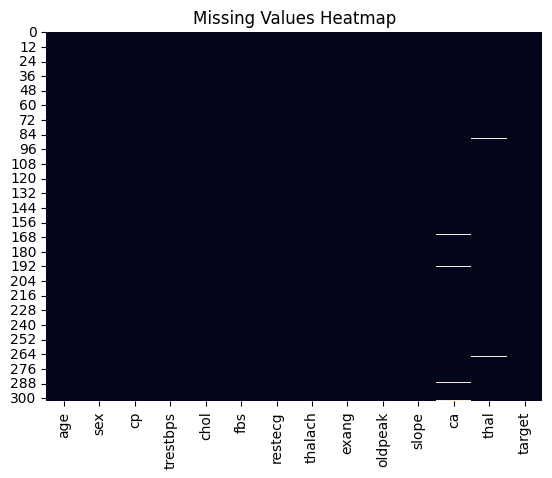

In [7]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

We seenhere that we are not missing too much values and can remove the null values from our data set

In [ ]:
#Fixing Null Values

#For the ca we know from the data set information that the number of major vessels (0-3) colored by flourosopy, so we can fill it with the mode
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

#Same for thal
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

#After filling them with their mode, we can check if we still have any more null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

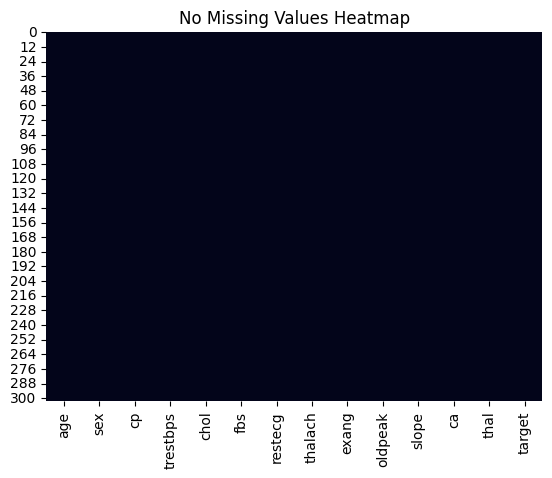

In [11]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('No Missing Values Heatmap')
plt.show()

In [12]:
#Looking for corrolation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.504092


In [13]:
#Collecting statistical data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
#So we can treat it as a multiclass or binary classification


In [8]:
#graphs


<Axes: >

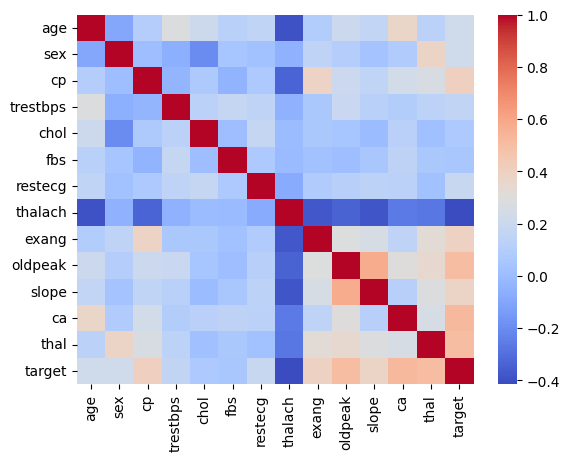

In [14]:
#Heat map of corrolated data
sns.heatmap(df.corr(), cmap= "coolwarm")

Feature Engineering & Preprocessing

From Collecting statistical data, We see that our data set is filled with age range(29 - 77), and the target goes from 0 to 4

Original Target Distribution:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


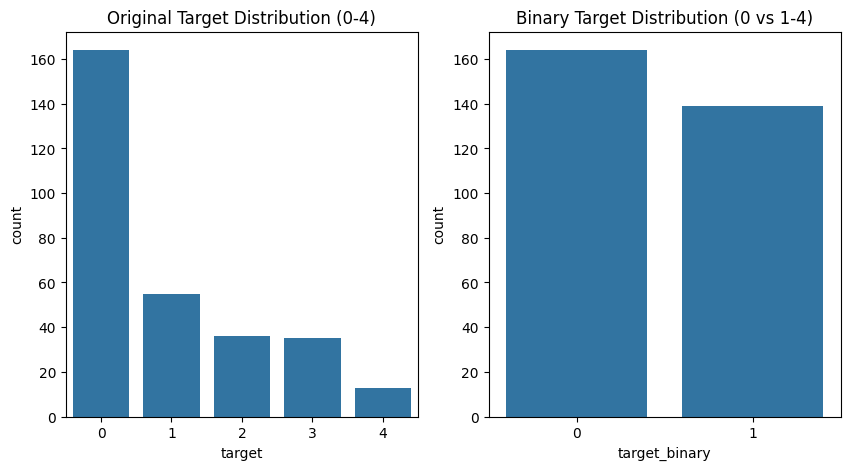


Binary Target Distribution:
target_binary
0    164
1    139
Name: count, dtype: int64

Binary Target Percentages:
target_binary
0    54.125413
1    45.874587
Name: proportion, dtype: float64


In [15]:
# Let's first look at the distribution of target values
print("Original Target Distribution:")
print(df['target'].value_counts().sort_index())

# Visualize the distribution
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='target')
plt.title('Original Target Distribution (0-4)')

# Convert to binary
df['target_binary'] = (df['target'] > 0).astype(int)

plt.subplot(1,2,2)
sns.countplot(data=df, x='target_binary')
plt.title('Binary Target Distribution (0 vs 1-4)')
plt.show()

print("\nBinary Target Distribution:")
print(df['target_binary'].value_counts())

# Show percentages
print("\nBinary Target Percentages:")
print(df['target_binary'].value_counts(normalize=True) * 100)

There is a good amount of proportion with the two, we can attempt to create a two models that predict both binary or as multicalsss classification, the select which has higher metric scores

For preprocesing and model selection , test split, metrics and any other machine learning implemmentation, we can utilize sklearn library: https://scikit-learn.org/stable/


Model Selection & Training

Training Process and Model Evaluation

Optimization Techniques

Model Interpretation & Bias Analysis

Deployment and Final Presentation

RESULTS

Refrences.